# Power calculations for adult connectivity contrasts 
### Univariate contrast to measure boundary response across regions of interest (ROI)
#### Measure: Univariate difference from 0 (in aduls) at event boundaries independently in each ROI
- Independent samples T-test

#### Cooper et al., 2021
The authors here use the same dataset from Reagh et al., 2020, a movie with 19 event boundaries. Below are aggregate connectivity sub-systems across ROIs. This is slightly different from the proposed analysis but still applicable because it suggests the authors are able to find an effect by aggregating connectivity across multiple ROIs.

- Dorsal PM subsystem 
    - Group 1: mean Z = 0.30, SE = 0.05, t(67) = 6.74, p < .001
    - Group 2: mean Z = 0.25, SE = 0.04, t(67) = 5.57, p < .001

In [2]:
# load modules
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.stats.power import FTestAnovaPower, TTestIndPower, TTestPower
from pingouin import ttest, anova
import pingouin as pg
data_dir = 'plots_from_papers'

In [23]:
# values from Cooper et al., 2021
n_adult = 68
dorsal_mean = 0.275  # averaged across groups
dorsal_se = 0.045  # averaged across groups
dorsal_sd = dorsal_se * np.sqrt(n_adult)

# simulate data points using mean and sd
nsim = 50
grp = np.repeat(['adult'], n_adult)
vals2 = np.random.normal(dorsal_mean, dorsal_sd, n_adult)
df2 = pd.DataFrame([grp, vals2], index=['group', 'values']).T
df2['values'] = df2['values'].astype('float') 
test_list = list()
for frac in [0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45]: # different fractions of full sample (N=68)
    for sim in range(nsim):
        sdf2 = df2.sample(frac=frac)
        tt2 = ttest(sdf2.loc[:,'values'].values, 0)
        tt2['samples'] = len(sdf2)
        test_list.append(tt2)
        
connectivity_tt_full = pd.concat(test_list)

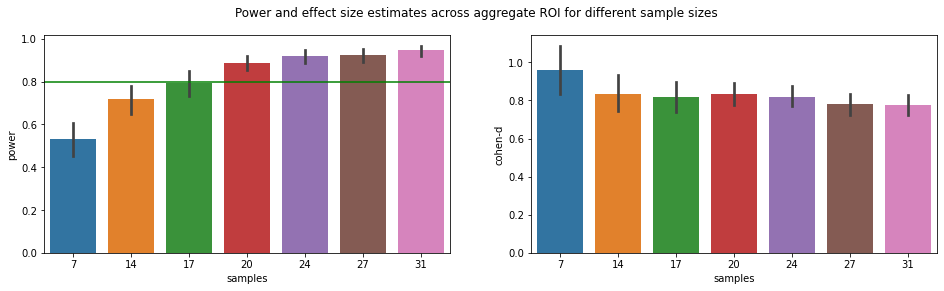

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(16,4))
sns.barplot(ax=ax[0], data=connectivity_tt_full, x='samples', y='power')
sns.barplot(ax=ax[1], data=connectivity_tt_full, x='samples', y='cohen-d')
fig.suptitle('Power and effect size estimates across aggregate ROI for different sample sizes')
ax[0].axhline(0.8, color='g')
None

Effect Size: 0.529


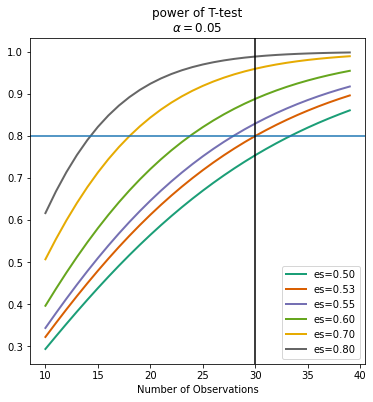

In [6]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1, 1,1)
fig = TTestPower().plot_power(dep_var='nobs',
                              nobs = np.arange(10, 40),
                              effect_size = np.array([0.5, 0.529, 0.55, 0.6, 0.7, 0.8]),
                              alpha = 0.05,
                              ax=ax, title='power of T-test' + '\n' + r'$\alpha = 0.05$')
plt.axhline(0.8)
plt.axvline(30, color='k')

# getting example sample size for an expected effect size
effect = 0.6
power = 0.8
alpha = 0.05
power_analysis = TTestPower()
result = power_analysis.solve_power(power=power, nobs=30, alpha=alpha)
print('Effect Size: %.3f' % result)
None

## Summary of connectivity power analysis in adults.
The effect size found in Cooper et al., 2020 is strong and the authors only needed around 20 participants to see their actual effect of interest the aggregated 'ventral' ROI. Our sample will have 30 participants, even if our effect size is not as strong i.e., 0.529 we would still have enough power to see our desired effect in adults.


# Calculated power for developmental connectivity contrasts 

### Univariate contrast to measure developmental differences in boundary related connectivity
#### Measure: Univariate difference between groups at event boundaries independently in each ROI
- Independent samples T-test

#### Riggins et al. 2016
Four and six year-olds performed memory related tasks over 120 items while being scanned in an MRI. The authors measured connectivity between HPC and cortical regions as participants performed the task. Here, we report positive relationship between HPC-Precuneus connectivity and memory ability a sample of 19, 
6 year-olds.

In [8]:
conn_kids_HP_PAR = os.path.join(data_dir, 'riggins_2016/conn_ant-PC_child_riggins_etal_2016.csv')
df = pd.read_csv(conn_kids_HP_PAR, header=1)
df.columns = ['episodic', 'antHPC_PC']
df.head()
nsim = 10
test_list = list()
for frac in [0.2, 0.3, 0.4, 0.5, 0.7, 0.8, 0.9]: # different fractions of full sample (N=19)
    for sim in range(nsim):
        sdf = df.sample(frac=frac).copy()
        av = ttest(sdf.loc[:,'antHPC_PC'].values, 0)
        av['samples'] = sdf.shape[0]
        test_list.append(av)
connectivity_tt_full_dev = pd.concat(test_list)

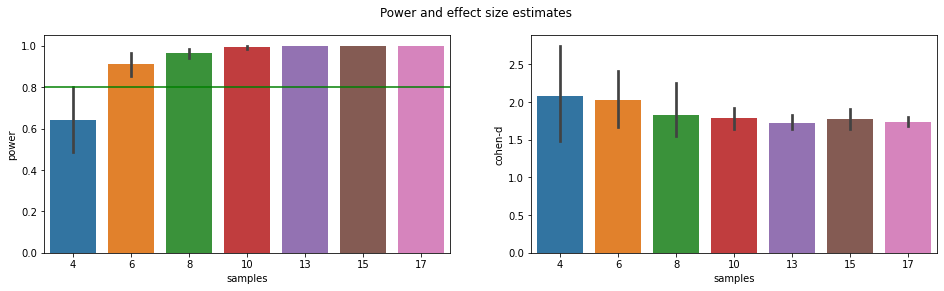

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(16,4))
sns.barplot(ax=ax[0], data=connectivity_tt_full_dev, x='samples', y='power')
sns.barplot(ax=ax[1], data=connectivity_tt_full_dev, x='samples', y='cohen-d')
fig.suptitle('Power and effect size estimates')
ax[0].axhline(0.8, color='g')
None

#### Blankenship et al., 2017

In this article, the authors performed resting-state analysis on a ~5 minute scan in a sample of 97, 4-10 year olds. Using the pengouin statistical package we can estimate the sample effect size based purely on the T-statistic (>0). The T-statisitic is from an age-dependent connectivity analysis between bilateral HPC and the whole brain. The authors found age-related improvements in connectivity between the ages of 4 and 10 years-old within a cluster in the temporal-parietal junction ( T (96) = 12.61) - a region that overlaps highly with our chosen ROIs. This gives us an effect size estimate in the literature. Furterhmore, we followed-up this effect size estimate with a power calculation to determine the effect size we need to see in our dataset (given the number of participants we have) to a significant connectivity effect in children. This will be the basis to determine that we have the power at least to detect effects in children.

In [19]:
#  'bi-HIP -- parietal-temporal':12.61, 
effsize = pg.compute_effsize_from_t(12.61, N=97)
print(f'Effect size from Blankenship et al. with a T-statistic of 12.61, is d = {effsize:0.3f}')

Effect size from Blankenship et al. with a T-statistic of 12.61, is d = 2.561


Effect Size needed to be sufficiently powered: d = 0.572


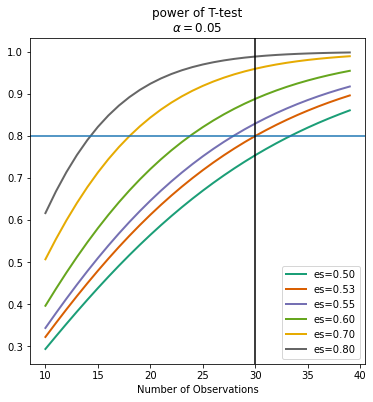

In [20]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1, 1,1)
fig = TTestPower().plot_power(dep_var='nobs',
                              nobs = np.arange(10, 40),
                              effect_size = np.array([0.5, 0.529, 0.55, 0.6, 0.7, 0.8]),
                              alpha = 0.05,
                              ax=ax, title='power of T-test' + '\n' + r'$\alpha = 0.05$')
plt.axhline(0.8)
plt.axvline(30, color='k')

# getting example sample size for an expected effect size
effect = 0.6
power = 0.8
alpha = 0.05
power_analysis = TTestPower()
result = power_analysis.solve_power(power=power, nobs=26, alpha=alpha)
print('Effect Size needed to be sufficiently powered: d = %.3f' % result)
None

## Summary of connectivity power analysis in adults.
The effect sizes found across the studies listed above are strong. We chose two studies that mimic our own dataset in different ways. The first set of analyses from Riggins et al. 2016 have a similar sample size to our dataset and a similar age range. The second set of analyses from Blankenship et al., had a similar number of data points collected within subject. Both reported effect sizes well above the minimum effect size we calculated as necessary to be sufficiently power the study and justify the analysis. Therefore, even if our effect size is much weaker than those reported here (minimum = 0.572, provided a sample size of 26) we believe we are justified in performing the proposed analyses.